# SemEval-2017 Task 4: Sentiment Analysis in Twitter arabic


In [1]:
import os
import random
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.cm as cm
from matplotlib import rcParams
from prettytable import PrettyTable
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem.isri import ISRIStemmer
from collections import Counter 
import itertools
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

from joblib import dump, load

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# **Get data**

In [2]:
# get data 
import pandas as pd

df = pd.read_table('../input/semevalll/SemEval2017-train.txt' , usecols=[1,2], encoding='utf-8', names=['sentiment', 'tweet'])
dataTest = pd.read_table('../input/semevalll/SemEval2017-test.txt', usecols=[1,2], encoding='utf-8', names=['sentiment', 'tweet'])                   
#combine = [dataTrain,dataTest]
df

sentiment                                              tweet
0     positive  ÿ•ÿ¨ÿ®ÿßÿ± ÿ£ÿ®ŸÑ ÿπŸÑŸâ ÿßŸÑÿ™ÿπÿßŸàŸÜ ÿπŸÑŸâ ŸÅŸÉ ÿ¥ŸÅÿ±ÿ© ÿßÿ¨Ÿáÿ≤ÿ™Ÿáÿß http...
1     positive  RT @20fourMedia: #ÿ∫Ÿàÿ∫ŸÑ ÿ™ÿ™ÿ≠ÿØŸâ ÿ£ÿ®ŸÑ Ÿàÿ£ŸÖÿßÿ≤ŸàŸÜ ÿ®ÿ£ÿ¨Ÿáÿ≤...
2     positive  ÿ¨Ÿàÿ¨ŸÑ ÿ™ŸÜÿßŸÅÿ≥ ÿ£ÿ®ŸÑ Ÿàÿ≥ÿßŸÖÿ≥ŸàŸÜÿ¨ ÿ®Ÿáÿßÿ™ŸÅ ÿ¨ÿØŸäÿØ https://t.c...
3     positive  ÿ±ÿ¶Ÿäÿ≥ ÿ¥ÿ±ŸÉÿ© ÿ£ÿ®ŸÑ: ÿßŸÑŸàÿßŸÇÿπ ÿßŸÑŸÖÿπÿ≤ÿ≤ ÿ≥Ÿäÿµÿ®ÿ≠ ÿ£ŸáŸÖ ŸÖŸÜ ÿßŸÑÿ∑ÿπ...
4      neutral  ÿ≥ÿßÿπÿ© ÿ£ÿ®ŸÑ ŸÅŸä ÿßŸÑÿ£ÿ≥ŸàÿßŸÇ ŸÖÿ±ÿ© ÿ£ÿÆÿ±Ÿâ https://t.co/dY2x...
...        ...                                                ...
3348  positive  ÿ∑ÿ±ŸäŸÇÿ© ÿ™ÿπÿ∑ŸäŸÑ ÿßŸä ÿ≤ÿ± ŸÅŸä ŸÑŸàÿ≠ÿ© ÿßŸÑŸÖŸÅÿßÿ™Ÿäÿ≠ ÿπŸÑŸâ ŸÜÿ∏ÿßŸÖ ŸàŸä...
3349   neutral  RT @syst__em: ÿ•ÿ∑ŸÑÿßŸÇ ÿ™ÿ≠ÿØŸäÿ´ ÿ™ÿ±ÿßŸÉŸÖŸä ÿ®ÿ±ŸÇŸÖ 14393.32...
3350   neutral  4 ÿ∑ÿ±ŸÇ ŸÑÿ≠ÿ∞ŸÅ ÿßŸÑŸÖŸÑŸÅÿßÿ™ ÿßŸÑŸÖÿ≥ÿ™ÿπÿµŸäÿ© ŸÖŸÜ ÿßŸÑÿ≠ÿ∞ŸÅ ŸÅŸä ŸàŸäŸÜÿØŸà...
3351   neutral  ÿ¥ÿ±ÿ≠ ŸÅŸäÿØŸäŸà ŸÖŸáŸÖ ÿ¨ÿØÿß ÿ≠ŸÑ ŸÑŸÖÿ¥ÿßŸÉŸÑ ÿßŸÑŸÉŸàŸÖÿ®ŸäŸàÿ™ÿ± ŸÉŸäŸÅ ÿ™ŸÇŸà...
3352   neutral  ÿµŸàÿ±ÿ© ŸÖÿ≥ÿ±ÿ®ÿ© ŸÑŸÄ ŸàŸäŸÜÿØŸàÿ≤ ŸÅŸàŸÜ 10 ÿ™Ÿàÿ∂ÿ≠ ÿ¥ŸÉŸÑ ÿßŸÑÿ£ŸäŸÇŸàŸÜÿßÿ™...

[3353 rows x 2 columns]

# **Processing**

# search and remove missing values

In [3]:
print(np.sum(df.isnull().any(axis=1)))

clean_df = df.dropna()
print(np.sum(clean_df.isnull().any(axis=1)))

0
0


In [4]:
print (df.notnull().any(axis = 0))


sentiment    True
tweet        True
dtype: bool


# Remove hashtag

In [5]:
def remove_hashtag(df, col = 'tweet'):
    for letter in r'#.][!XR':
        df[col] = df[col].astype(str).str.replace(letter,'', regex=True)
    

        
remove_hashtag(clean_df)
clean_df

sentiment                                              tweet
0     positive  ÿ•ÿ¨ÿ®ÿßÿ± ÿ£ÿ®ŸÑ ÿπŸÑŸâ ÿßŸÑÿ™ÿπÿßŸàŸÜ ÿπŸÑŸâ ŸÅŸÉ ÿ¥ŸÅÿ±ÿ© ÿßÿ¨Ÿáÿ≤ÿ™Ÿáÿß http...
1     positive  T @20fourMedia: ÿ∫Ÿàÿ∫ŸÑ ÿ™ÿ™ÿ≠ÿØŸâ ÿ£ÿ®ŸÑ Ÿàÿ£ŸÖÿßÿ≤ŸàŸÜ ÿ®ÿ£ÿ¨Ÿáÿ≤ÿ© ...
2     positive  ÿ¨Ÿàÿ¨ŸÑ ÿ™ŸÜÿßŸÅÿ≥ ÿ£ÿ®ŸÑ Ÿàÿ≥ÿßŸÖÿ≥ŸàŸÜÿ¨ ÿ®Ÿáÿßÿ™ŸÅ ÿ¨ÿØŸäÿØ https://tco...
3     positive  ÿ±ÿ¶Ÿäÿ≥ ÿ¥ÿ±ŸÉÿ© ÿ£ÿ®ŸÑ: ÿßŸÑŸàÿßŸÇÿπ ÿßŸÑŸÖÿπÿ≤ÿ≤ ÿ≥Ÿäÿµÿ®ÿ≠ ÿ£ŸáŸÖ ŸÖŸÜ ÿßŸÑÿ∑ÿπ...
4      neutral  ÿ≥ÿßÿπÿ© ÿ£ÿ®ŸÑ ŸÅŸä ÿßŸÑÿ£ÿ≥ŸàÿßŸÇ ŸÖÿ±ÿ© ÿ£ÿÆÿ±Ÿâ https://tco/dY2xO...
...        ...                                                ...
3348  positive  ÿ∑ÿ±ŸäŸÇÿ© ÿ™ÿπÿ∑ŸäŸÑ ÿßŸä ÿ≤ÿ± ŸÅŸä ŸÑŸàÿ≠ÿ© ÿßŸÑŸÖŸÅÿßÿ™Ÿäÿ≠ ÿπŸÑŸâ ŸÜÿ∏ÿßŸÖ ŸàŸä...
3349   neutral  T @syst__em: ÿ•ÿ∑ŸÑÿßŸÇ ÿ™ÿ≠ÿØŸäÿ´ ÿ™ÿ±ÿßŸÉŸÖŸä ÿ®ÿ±ŸÇŸÖ 14393321 ...
3350   neutral  4 ÿ∑ÿ±ŸÇ ŸÑÿ≠ÿ∞ŸÅ ÿßŸÑŸÖŸÑŸÅÿßÿ™ ÿßŸÑŸÖÿ≥ÿ™ÿπÿµŸäÿ© ŸÖŸÜ ÿßŸÑÿ≠ÿ∞ŸÅ ŸÅŸä ŸàŸäŸÜÿØŸà...
3351   neutral  ÿ¥ÿ±ÿ≠ ŸÅŸäÿØŸäŸà ŸÖŸáŸÖ ÿ¨ÿØÿß ÿ≠ŸÑ ŸÑŸÖÿ¥ÿßŸÉŸÑ ÿßŸÑŸÉŸàŸÖÿ®ŸäŸàÿ™ÿ± ŸÉŸäŸÅ ÿ™ŸÇŸà...
3352   neutral  ÿµŸàÿ±ÿ© ŸÖÿ≥ÿ±ÿ®ÿ© ŸÑŸÄ ŸàŸäŸÜÿØŸàÿ≤ ŸÅŸàŸÜ 10 ÿ™Ÿàÿ∂ÿ≠ ÿ¥ŸÉŸÑ ÿßŸÑÿ£ŸäŸÇŸàŸÜÿßÿ™...

[3353 rows x 2 columns]

# Remove Punctuations

In [6]:
arabic_punctuations = '''`√∑√óÿõ<>_()*&^%][ŸÄÿå/:"ÿü.,'{}~¬¶+|!‚Äù‚Ä¶‚Äú‚ÄìŸÄ'''
english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations

def remove_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

# Normalization

In [7]:
def normalize_arabic(text):
    text = re.sub("[ÿ•ÿ£ÿ¢ÿß]", "ÿß", text)
    text = re.sub("Ÿâ", "Ÿä", text)
    text = re.sub("ÿ©", "Ÿá", text)
    text = re.sub("⁄Ø", "ŸÉ", text)
    return text

# Remove Repeating Char

In [8]:
def remove_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

# Processing Labels

In [9]:
def procesSentiment(Sentiment):
    Sentiment = re.sub("positive", "1", Sentiment)
    Sentiment = re.sub("negative", "-1", Sentiment)
    Sentiment = re.sub("neutral", "0", Sentiment)
    return Sentiment
        

In [10]:
def processDocument(doc, stemmer): 

    #Replace @username with empty string
    doc = re.sub(r'@[^\s]+', ' ', doc)
    doc = re.sub(r'_', ' ', doc)
    doc = re.sub(r'\n', ' ', doc)
    doc = re.sub(r'[a-z,A-Z]', '', doc)
    doc = re.sub(r'\d', '', doc)
    #Convert www.* or https?://* to " "
    doc = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',doc)
    #Replace #word with word
    doc = re.sub(r'#([^\s]+)', r'\1', doc)
    # remove punctuations
    doc= remove_punctuations(doc)
    # normalize the tweet
    doc= normalize_arabic(doc)
    # remove repeated letters
    doc=remove_repeating_char(doc)
    #stemming
    doc = stemmer.stem(doc)
   
    return doc



stemmer = ISRIStemmer()
clean_df["tweet"] = clean_df['tweet'].apply(lambda x: processDocument(x, stemmer))
clean_df["sentiment"] =clean_df['sentiment'].apply(lambda x: procesSentiment(x))
clean_df["sentiment"]
clean_df

sentiment                                              tweet
0            1         ÿßÿ¨ÿ®ÿßÿ± ÿßÿ®ŸÑ ÿπŸÑŸä ÿßŸÑÿ™ÿπÿßŸàŸÜ ÿπŸÑŸä ŸÅŸÉ ÿ¥ŸÅÿ±Ÿá ÿßÿ¨Ÿáÿ≤ÿ™Ÿáÿß 
1            1                ÿ∫Ÿàÿ∫ŸÑ ÿ™ÿ≠ÿØŸä ÿßÿ®ŸÑ ŸàÿßŸÖÿßÿ≤ŸàŸÜ ÿ®ÿßÿ¨Ÿáÿ≤Ÿá ÿ¨ÿØŸäÿØŸá 
2            1                ÿ¨Ÿàÿ¨ŸÑ ÿ™ŸÜÿßŸÅÿ≥ ÿßÿ®ŸÑ Ÿàÿ≥ÿßŸÖÿ≥ŸàŸÜÿ¨ ÿ®Ÿáÿßÿ™ŸÅ ÿ¨ÿØŸäÿØ 
3            1    ÿ±ÿ¶Ÿäÿ≥ ÿ¥ÿ±ŸÉŸá ÿßÿ®ŸÑ ÿßŸÑŸàÿßŸÇÿπ ÿßŸÑŸÖÿπÿ≤ ÿ≥Ÿäÿµÿ®ÿ≠ ÿßŸáŸÖ ŸÖŸÜ ÿßŸÑÿ∑ÿπÿßŸÖ 
4            0                      ÿ≥ÿßÿπŸá ÿßÿ®ŸÑ ŸÅŸä ÿßŸÑÿßÿ≥ŸàÿßŸÇ ŸÖÿ±Ÿá ÿßÿÆÿ±Ÿä 
...        ...                                                ...
3348         1  ÿ∑ÿ±ŸäŸÇŸá ÿ™ÿπÿ∑ŸäŸÑ ÿßŸä ÿ≤ÿ± ŸÅŸä ŸÑŸàÿ≠Ÿá ÿßŸÑŸÖŸÅÿßÿ™Ÿäÿ≠ ÿπŸÑŸä ŸÜÿ∏ÿßŸÖ ŸàŸä...
3349         0   ÿßÿ∑ŸÑÿßŸÇ ÿ™ÿ≠ÿØŸäÿ´ ÿ™ÿ±ÿßŸÉŸÖŸä ÿ®ÿ±ŸÇŸÖ ŸÑ ŸàŸäŸÜÿØŸàÿ≤ ÿßŸÑŸÖŸÉÿ™ÿ®Ÿä ŸàÿßŸÑŸá...
3350         0   ÿ∑ÿ±ŸÇ ŸÑÿ≠ÿ∞ŸÅ ÿßŸÑŸÖŸÑŸÅÿßÿ™ ÿßŸÑŸÖÿ≥ÿ™ÿπÿµŸäŸá ŸÖŸÜ ÿßŸÑÿ≠ÿ∞ŸÅ ŸÅŸä ŸàŸäŸÜÿØŸàÿ≤...
3351         0  ÿ¥ÿ±ÿ≠ ŸÅŸäÿØŸäŸà ŸÖŸáŸÖ ÿ¨ÿØÿß ÿ≠ŸÑ ŸÑŸÖÿ¥ÿßŸÉŸÑ ÿßŸÑŸÉŸàŸÖÿ®ŸäŸàÿ™ÿ± ŸÉŸäŸÅ ÿ™ŸÇŸà...
3352         0  ÿµŸàÿ±Ÿá ŸÖÿ≥ÿ±ÿ®Ÿá ŸÑ ŸàŸäŸÜÿØŸàÿ≤ ŸÅŸàŸÜ ÿ™Ÿàÿ∂ÿ≠ ÿ¥ŸÉŸÑ ÿßŸÑÿßŸäŸÇŸàŸÜÿßÿ™ ÿßŸÑÿ±...

[3353 rows x 2 columns]

In [11]:
tokenizer = RegexpTokenizer(r'\w+')
clean_df["tweet"] = clean_df["tweet"].apply(tokenizer.tokenize)
# print(clean_df['text'].values[0])
clean_df

sentiment                                              tweet
0            1  [ÿßÿ¨ÿ®ÿßÿ±, ÿßÿ®ŸÑ, ÿπŸÑŸä, ÿßŸÑÿ™ÿπÿßŸàŸÜ, ÿπŸÑŸä, ŸÅŸÉ, ÿ¥ŸÅÿ±Ÿá, ÿßÿ¨Ÿáÿ≤...
1            1          [ÿ∫Ÿàÿ∫ŸÑ, ÿ™ÿ≠ÿØŸä, ÿßÿ®ŸÑ, ŸàÿßŸÖÿßÿ≤ŸàŸÜ, ÿ®ÿßÿ¨Ÿáÿ≤Ÿá, ÿ¨ÿØŸäÿØŸá]
2            1          [ÿ¨Ÿàÿ¨ŸÑ, ÿ™ŸÜÿßŸÅÿ≥, ÿßÿ®ŸÑ, Ÿàÿ≥ÿßŸÖÿ≥ŸàŸÜÿ¨, ÿ®Ÿáÿßÿ™ŸÅ, ÿ¨ÿØŸäÿØ]
3            1  [ÿ±ÿ¶Ÿäÿ≥, ÿ¥ÿ±ŸÉŸá, ÿßÿ®ŸÑ, ÿßŸÑŸàÿßŸÇÿπ, ÿßŸÑŸÖÿπÿ≤, ÿ≥Ÿäÿµÿ®ÿ≠, ÿßŸáŸÖ, ŸÖ...
4            0                [ÿ≥ÿßÿπŸá, ÿßÿ®ŸÑ, ŸÅŸä, ÿßŸÑÿßÿ≥ŸàÿßŸÇ, ŸÖÿ±Ÿá, ÿßÿÆÿ±Ÿä]
...        ...                                                ...
3348         1  [ÿ∑ÿ±ŸäŸÇŸá, ÿ™ÿπÿ∑ŸäŸÑ, ÿßŸä, ÿ≤ÿ±, ŸÅŸä, ŸÑŸàÿ≠Ÿá, ÿßŸÑŸÖŸÅÿßÿ™Ÿäÿ≠, ÿπŸÑŸä...
3349         0  [ÿßÿ∑ŸÑÿßŸÇ, ÿ™ÿ≠ÿØŸäÿ´, ÿ™ÿ±ÿßŸÉŸÖŸä, ÿ®ÿ±ŸÇŸÖ, ŸÑ, ŸàŸäŸÜÿØŸàÿ≤, ÿßŸÑŸÖŸÉÿ™ÿ®...
3350         0  [ÿ∑ÿ±ŸÇ, ŸÑÿ≠ÿ∞ŸÅ, ÿßŸÑŸÖŸÑŸÅÿßÿ™, ÿßŸÑŸÖÿ≥ÿ™ÿπÿµŸäŸá, ŸÖŸÜ, ÿßŸÑÿ≠ÿ∞ŸÅ, ŸÅŸä,...
3351         0  [ÿ¥ÿ±ÿ≠, ŸÅŸäÿØŸäŸà, ŸÖŸáŸÖ, ÿ¨ÿØÿß, ÿ≠ŸÑ, ŸÑŸÖÿ¥ÿßŸÉŸÑ, ÿßŸÑŸÉŸàŸÖÿ®ŸäŸàÿ™ÿ±,...
3352         0  [ÿµŸàÿ±Ÿá, ŸÖÿ≥ÿ±ÿ®Ÿá, ŸÑ, ŸàŸäŸÜÿØŸàÿ≤, ŸÅŸàŸÜ, ÿ™Ÿàÿ∂ÿ≠, ÿ¥ŸÉŸÑ, ÿßŸÑÿßŸäŸÇ...

[3353 rows x 2 columns]

# Remove Stop Words

In [12]:
stopwords_list = stopwords.words('arabic')
listToStr = ' '.join([str(elem) for elem in stopwords_list]) 
print(listToStr)

ÿ•ÿ∞ ÿ•ÿ∞ÿß ÿ•ÿ∞ŸÖÿß ÿ•ÿ∞ŸÜ ÿ£ŸÅ ÿ£ŸÇŸÑ ÿ£ŸÉÿ´ÿ± ÿ£ŸÑÿß ÿ•ŸÑÿß ÿßŸÑÿ™Ÿä ÿßŸÑÿ∞Ÿä ÿßŸÑÿ∞ŸäŸÜ ÿßŸÑŸÑÿßÿ™Ÿä ÿßŸÑŸÑÿßÿ¶Ÿä ÿßŸÑŸÑÿ™ÿßŸÜ ÿßŸÑŸÑÿ™Ÿäÿß ÿßŸÑŸÑÿ™ŸäŸÜ ÿßŸÑŸÑÿ∞ÿßŸÜ ÿßŸÑŸÑÿ∞ŸäŸÜ ÿßŸÑŸÑŸàÿßÿ™Ÿä ÿ•ŸÑŸâ ÿ•ŸÑŸäŸÉ ÿ•ŸÑŸäŸÉŸÖ ÿ•ŸÑŸäŸÉŸÖÿß ÿ•ŸÑŸäŸÉŸÜ ÿ£ŸÖ ÿ£ŸÖÿß ÿ£ŸÖÿß ÿ•ŸÖÿß ÿ£ŸÜ ÿ•ŸÜ ÿ•ŸÜÿß ÿ£ŸÜÿß ÿ£ŸÜÿ™ ÿ£ŸÜÿ™ŸÖ ÿ£ŸÜÿ™ŸÖÿß ÿ£ŸÜÿ™ŸÜ ÿ•ŸÜŸÖÿß ÿ•ŸÜŸá ÿ£ŸÜŸâ ÿ£ŸÜŸâ ÿ¢Ÿá ÿ¢Ÿáÿß ÿ£Ÿà ÿ£ŸàŸÑÿßÿ° ÿ£ŸàŸÑÿ¶ŸÉ ÿ£ŸàŸá ÿ¢Ÿä ÿ£Ÿä ÿ£ŸäŸáÿß ÿ•Ÿä ÿ£ŸäŸÜ ÿ£ŸäŸÜ ÿ£ŸäŸÜŸÖÿß ÿ•ŸäŸá ÿ®ÿÆ ÿ®ÿ≥ ÿ®ÿπÿØ ÿ®ÿπÿ∂ ÿ®ŸÉ ÿ®ŸÉŸÖ ÿ®ŸÉŸÖ ÿ®ŸÉŸÖÿß ÿ®ŸÉŸÜ ÿ®ŸÑ ÿ®ŸÑŸâ ÿ®ŸÖÿß ÿ®ŸÖÿßÿ∞ÿß ÿ®ŸÖŸÜ ÿ®ŸÜÿß ÿ®Ÿá ÿ®Ÿáÿß ÿ®ŸáŸÖ ÿ®ŸáŸÖÿß ÿ®ŸáŸÜ ÿ®Ÿä ÿ®ŸäŸÜ ÿ®ŸäÿØ ÿ™ŸÑŸÉ ÿ™ŸÑŸÉŸÖ ÿ™ŸÑŸÉŸÖÿß ÿ™Ÿá ÿ™Ÿä ÿ™ŸäŸÜ ÿ™ŸäŸÜŸÉ ÿ´ŸÖ ÿ´ŸÖÿ© ÿ≠ÿßÿ¥ÿß ÿ≠ÿ®ÿ∞ÿß ÿ≠ÿ™Ÿâ ÿ≠Ÿäÿ´ ÿ≠Ÿäÿ´ŸÖÿß ÿ≠ŸäŸÜ ÿÆŸÑÿß ÿØŸàŸÜ ÿ∞ÿß ÿ∞ÿßÿ™ ÿ∞ÿßŸÉ ÿ∞ÿßŸÜ ÿ∞ÿßŸÜŸÉ ÿ∞ŸÑŸÉ ÿ∞ŸÑŸÉŸÖ ÿ∞ŸÑŸÉŸÖÿß ÿ∞ŸÑŸÉŸÜ ÿ∞Ÿá ÿ∞Ÿà ÿ∞Ÿàÿß ÿ∞Ÿàÿßÿ™ÿß ÿ∞Ÿàÿßÿ™Ÿä ÿ∞Ÿä ÿ∞ŸäŸÜ ÿ∞ŸäŸÜŸÉ ÿ±Ÿäÿ´ ÿ≥ŸàŸÅ ÿ≥ŸàŸâ ÿ¥ÿ™ÿßŸÜ ÿπÿØÿß ÿπÿ≥Ÿâ ÿπŸÑ ÿπŸÑŸâ ÿπŸÑŸäŸÉ ÿπŸÑŸäŸá ÿπŸÖÿß ÿπŸÜ ÿπŸÜÿØ ÿ∫Ÿäÿ± ŸÅÿ•ÿ∞ÿß ŸÅÿ•ŸÜ 

In [13]:
clean_df["tweet"] = clean_df["tweet"].apply(lambda x: [item for item in x if item not in stopwords_list])
clean_df

sentiment                                              tweet
0            1  [ÿßÿ¨ÿ®ÿßÿ±, ÿßÿ®ŸÑ, ÿπŸÑŸä, ÿßŸÑÿ™ÿπÿßŸàŸÜ, ÿπŸÑŸä, ŸÅŸÉ, ÿ¥ŸÅÿ±Ÿá, ÿßÿ¨Ÿáÿ≤...
1            1          [ÿ∫Ÿàÿ∫ŸÑ, ÿ™ÿ≠ÿØŸä, ÿßÿ®ŸÑ, ŸàÿßŸÖÿßÿ≤ŸàŸÜ, ÿ®ÿßÿ¨Ÿáÿ≤Ÿá, ÿ¨ÿØŸäÿØŸá]
2            1          [ÿ¨Ÿàÿ¨ŸÑ, ÿ™ŸÜÿßŸÅÿ≥, ÿßÿ®ŸÑ, Ÿàÿ≥ÿßŸÖÿ≥ŸàŸÜÿ¨, ÿ®Ÿáÿßÿ™ŸÅ, ÿ¨ÿØŸäÿØ]
3            1  [ÿ±ÿ¶Ÿäÿ≥, ÿ¥ÿ±ŸÉŸá, ÿßÿ®ŸÑ, ÿßŸÑŸàÿßŸÇÿπ, ÿßŸÑŸÖÿπÿ≤, ÿ≥Ÿäÿµÿ®ÿ≠, ÿßŸáŸÖ, ÿß...
4            0                    [ÿ≥ÿßÿπŸá, ÿßÿ®ŸÑ, ÿßŸÑÿßÿ≥ŸàÿßŸÇ, ŸÖÿ±Ÿá, ÿßÿÆÿ±Ÿä]
...        ...                                                ...
3348         1  [ÿ∑ÿ±ŸäŸÇŸá, ÿ™ÿπÿ∑ŸäŸÑ, ÿßŸä, ÿ≤ÿ±, ŸÑŸàÿ≠Ÿá, ÿßŸÑŸÖŸÅÿßÿ™Ÿäÿ≠, ÿπŸÑŸä, ŸÜÿ∏...
3349         0  [ÿßÿ∑ŸÑÿßŸÇ, ÿ™ÿ≠ÿØŸäÿ´, ÿ™ÿ±ÿßŸÉŸÖŸä, ÿ®ÿ±ŸÇŸÖ, ŸÑ, ŸàŸäŸÜÿØŸàÿ≤, ÿßŸÑŸÖŸÉÿ™ÿ®...
3350         0  [ÿ∑ÿ±ŸÇ, ŸÑÿ≠ÿ∞ŸÅ, ÿßŸÑŸÖŸÑŸÅÿßÿ™, ÿßŸÑŸÖÿ≥ÿ™ÿπÿµŸäŸá, ÿßŸÑÿ≠ÿ∞ŸÅ, ŸàŸäŸÜÿØŸàÿ≤,...
3351         0  [ÿ¥ÿ±ÿ≠, ŸÅŸäÿØŸäŸà, ŸÖŸáŸÖ, ÿ¨ÿØÿß, ÿ≠ŸÑ, ŸÑŸÖÿ¥ÿßŸÉŸÑ, ÿßŸÑŸÉŸàŸÖÿ®ŸäŸàÿ™ÿ±,...
3352         0  [ÿµŸàÿ±Ÿá, ŸÖÿ≥ÿ±ÿ®Ÿá, ŸÑ, ŸàŸäŸÜÿØŸàÿ≤, ŸÅŸàŸÜ, ÿ™Ÿàÿ∂ÿ≠, ÿ¥ŸÉŸÑ, ÿßŸÑÿßŸäŸÇ...

[3353 rows x 2 columns]

# Count Propetries

In [14]:
def countPropetries(df):
    all_words = [word for tokens in df["tweet"] for word in tokens]
    sentence_lengths = [len(tokens) for tokens in df["tweet"]]

    VOCAB = sorted(list(set(all_words)))

    print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
    print("Max sentence length is %s" % max(sentence_lengths))
    return all_words

In [15]:
positive_df = clean_df.loc[clean_df["sentiment"] == '1']
neutral_df = clean_df.loc[clean_df["sentiment"] == '0']
negative_df = clean_df.loc[clean_df["sentiment"] == '-1']

print("positive : ")
positive_words = countPropetries(positive_df)
print("\nneutral : ")
neutral_words = countPropetries(neutral_df)
print("\nnegative : ")
negative_words = countPropetries(negative_df)


positive : 
8312 words total, with a vocabulary size of 4476
Max sentence length is 24

neutral : 
15433 words total, with a vocabulary size of 7407
Max sentence length is 28

negative : 
14765 words total, with a vocabulary size of 7403
Max sentence length is 26


In [16]:
def plot(all_words, title):
    counted_words = Counter(all_words)

    words = []
    counts = []
    for letter, count in counted_words.most_common(25):
        words.append(letter)
        counts.append(count)

    colors = cm.rainbow(np.linspace(0, 1, 10))
    rcParams['figure.figsize'] = 20, 10

    plt.title(title)
    plt.xlabel('Count')
    plt.ylabel('Words')
    plt.barh(words, counts, color=colors)

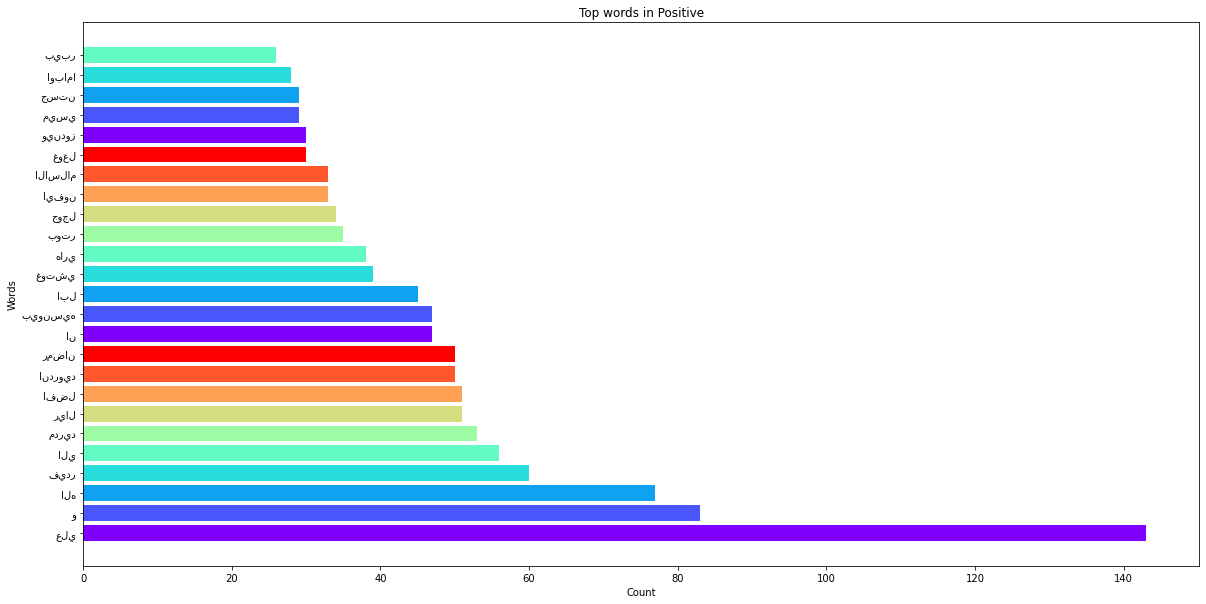

In [17]:
plot(positive_words, 'Top words in Positive')


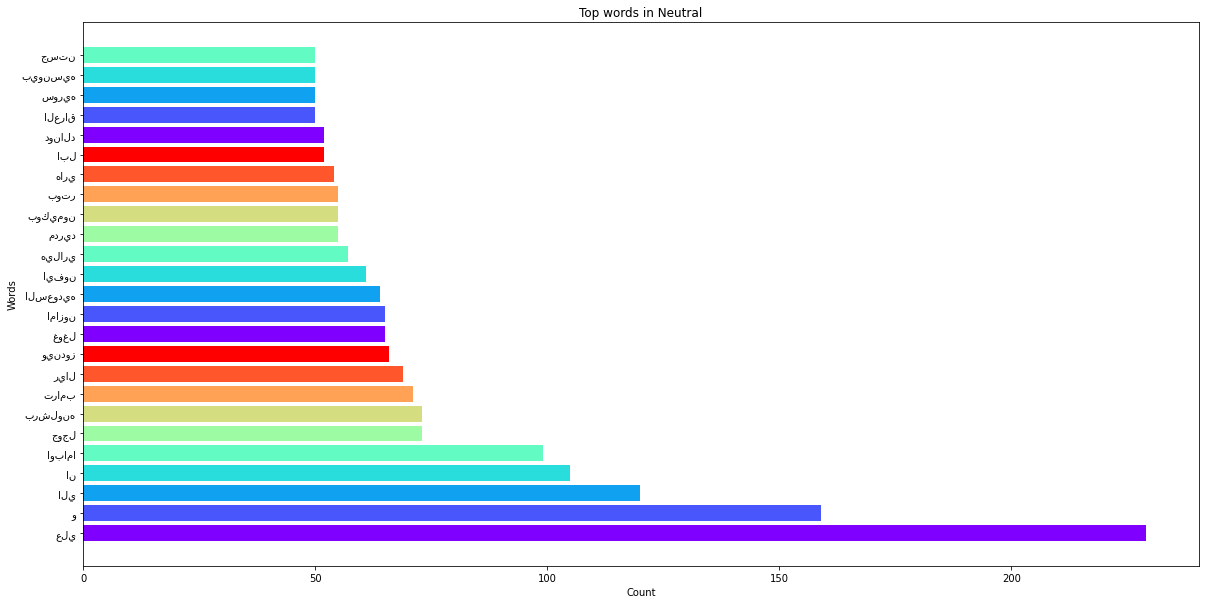

In [18]:
plot(neutral_words, 'Top words in Neutral')


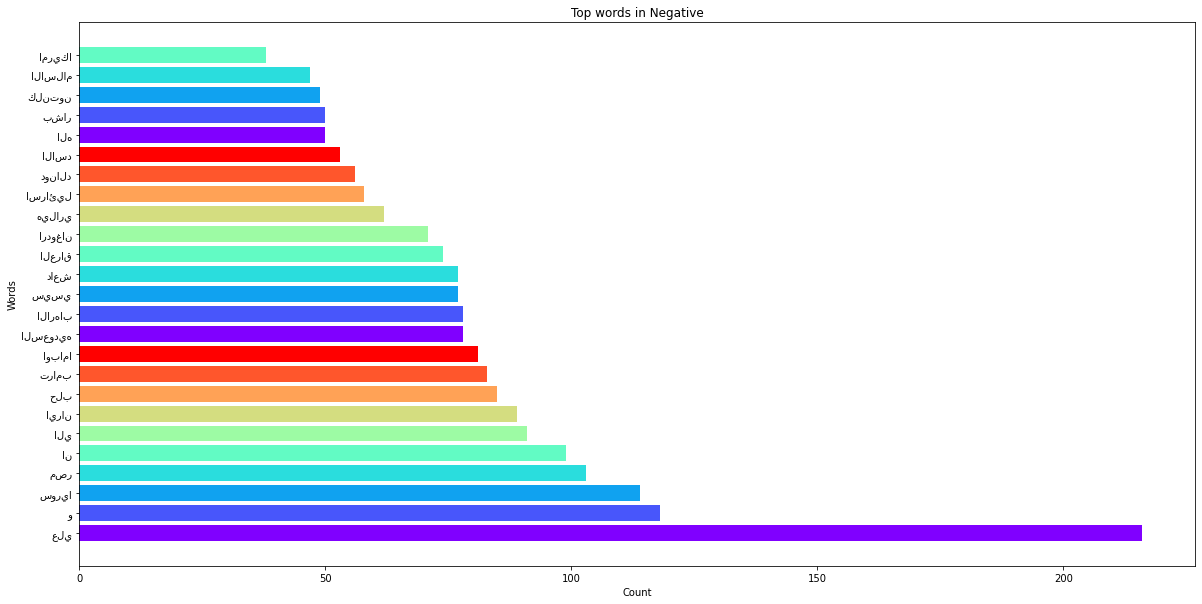

In [19]:
plot(negative_words, 'Top words in Negative')


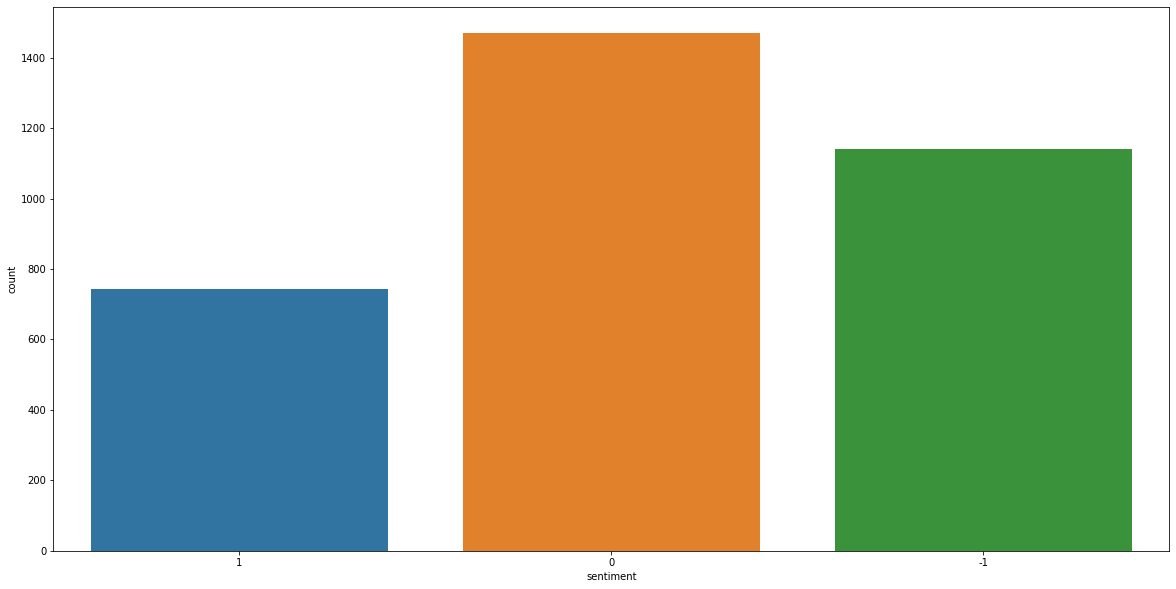

In [20]:
sns.countplot(data= clean_df, x = "sentiment")
plt.show()

# Split Data

In [21]:
y = clean_df['sentiment']
X = clean_df['tweet']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)

# Feature Extraction

In [22]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    ngram_range=(1, 1),
    max_features =10000)

# Fit The Pipeline To The Training Data

In [23]:

model = Pipeline([
                    ("tfidf", word_vectorizer), # convert words to numbers using tfidf
                    ("clf", SVC()) # model the text
])

# Fit the pipeline to the training data
model.fit(X_train.astype('str'), y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=10000, strip_accents='unicode',
                                 sublinear_tf=True)),
                ('clf', SVC())])

In [24]:
dump(model, "svm_model.joblib")


['svm_model.joblib']

# Results

In [25]:
def calculate_results(y_true, y_pred):
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

y_pred = model.predict(X_test.astype('str'))
result = calculate_results(y_test, y_pred)
result

{'accuracy': 59.475566150178786,
 'precision': 0.638869220026472,
 'recall': 0.5947556615017878,
 'f1': 0.5642415994116097}

# Plot Confusion Matrix

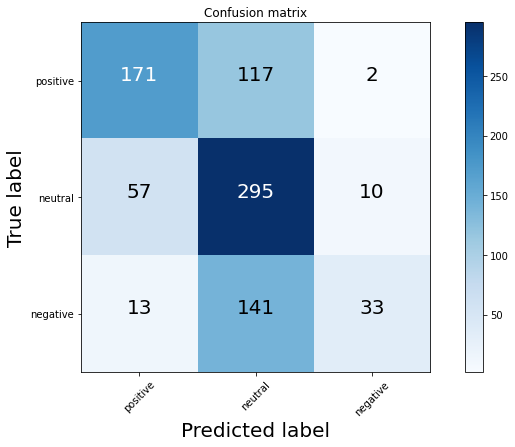

In [26]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    fig = plt.figure(figsize = (10,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 fontsize=20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', fontsize=20)
    plt.xlabel('Predicted label', fontsize=20)

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, ['positive', 'neutral', 'negative'])

# Testing

In [27]:
df =dataTest
df

sentiment                                              tweet
0     positive                              @Alito_NBA ÿ¨Ÿàÿßÿ® ÿ∞ŸÉŸä üòÇ
1      neutral                         @its_NBA @ssrg90 ŸÉŸÑÿßŸÖ ÿ≥ŸÑŸäŸÖ
2     negative  @nba_155 ŸäÿßÿÆÿ≤ŸäÿßŸá ÿ®ÿ≥ ÿµÿßÿ±ÿÆÿ™ ÿµÿ±ÿßÿÆ Ÿàÿßÿ≤ÿπÿ¨ÿ™ŸÉŸÖ ŸÖÿ¥ŸÉŸÑÿ© ...
3      neutral                          @nba_155 ÿµŸàÿ™Ÿä ÿ±ÿßÿ≠ ÿßŸÇŸàŸÑŸÉ üíî
4     negative  @Alito_NBA ÿßŸÜÿß ŸÖÿßÿÆŸÅÿ™ ŸÖŸÜ ÿ¥Ÿä ÿßŸÑÿß ÿßŸÜ ŸäŸÉŸàŸÜ ÿπŸÇŸÑŸäÿ© ŸÖ...
...        ...                                                ...
6093   neutral         ÿ™ŸÇŸàŸÑ ŸÜŸàÿßŸÑ ÿßŸÑÿ≤ÿ∫ÿ®Ÿä : https://t.co/BozQHk3pJU
6094  positive  ÿ≥ŸäŸÑŸÅŸä ŸÑŸÑŸÅŸÜÿßŸÜÿ© üëáÿßŸÑÿ∞Ÿáÿ®Ÿäÿ© #ŸÜŸàÿßŸÑ_ÿßŸÑÿ≤ÿ∫ÿ®Ÿä @NawalElZo...
6095  positive  ŸÅŸÜÿßŸÜÿ© ŸÑÿ®ŸÜÿßŸÜŸäÿ© ŸÉÿ®Ÿäÿ±ÿ©  ÿµŸàÿ™Ÿáÿß ÿ•ÿ≥ÿ∑Ÿàÿ±Ÿä ÿü! #ŸÖÿßÿ¨ÿØÿ©_ÿßŸÑ...
6096  positive    @i_7md ÿ™ÿ∞ŸÉÿ±ŸÜŸä ÿ®ÿ£ÿ∫ŸÜŸäÿ© ŸÜŸàÿßŸÑ ÿßŸÑÿ≤ÿ∫ÿ®Ÿä ÿπŸäŸÜŸäŸÉ ŸÉÿØÿßÿ®ŸäŸÜ""
6097  positive  ŸÜŸàÿßŸÑ ÿßŸÑÿ≤ÿ∫ÿ®Ÿä ŸÑÿ∑ŸäŸÅŸá ÿßŸÑŸÅŸÜÿßŸÜŸá ÿßŸÑŸàÿ≠ŸäÿØŸá ÿßŸÑŸÑŸä ŸÉŸÑ ÿßŸÑŸÅŸä...

[6098 rows x 2 columns]

In [28]:
def prepareData(df):
    remove_hashtag(df, 'tweet')
    df["tweet"] = df['tweet'].apply(lambda x: processDocument(x, stemmer))
    tokenizer = RegexpTokenizer(r'\w+')
    df["tweet"] = df["tweet"].apply(tokenizer.tokenize)
    stopwords_list = stopwords.words('arabic')
    df["tweet"] = df["tweet"].apply(lambda x: [item for item in x if item not in stopwords_list])
    return df

prepared_df = prepareData(df)
prepared_df

sentiment                                              tweet
0     positive                                        [ÿ¨Ÿàÿßÿ®, ÿ∞ŸÉŸä]
1      neutral                                       [ŸÉŸÑÿßŸÖ, ÿ≥ŸÑŸäŸÖ]
2     negative  [ŸäÿßÿÆÿ≤ŸäÿßŸá, ÿµÿßÿ±ÿÆÿ™, ÿµÿ±ÿßÿÆ, Ÿàÿßÿ≤ÿπÿ¨ÿ™ŸÉŸÖ, ŸÖÿ¥ŸÉŸÑŸá, ÿßŸÑÿ™ŸàŸÇŸä...
3      neutral                                 [ÿµŸàÿ™Ÿä, ÿ±ÿßÿ≠, ÿßŸÇŸàŸÑŸÉ]
4     negative  [ÿßŸÜÿß, ŸÖÿßÿÆŸÅÿ™, ÿ¥Ÿä, ÿßŸÑÿß, ÿßŸÜ, ŸäŸÉŸàŸÜ, ÿπŸÇŸÑŸäŸá, ŸÖÿ¥ÿ¨ÿπŸä, ...
...        ...                                                ...
6093   neutral                               [ÿ™ŸÇŸàŸÑ, ŸÜŸàÿßŸÑ, ÿßŸÑÿ≤ÿ∫ÿ®Ÿä]
6094  positive  [ÿ≥ŸäŸÑŸÅŸä, ŸÑŸÅŸÜÿßŸÜŸá, ÿßŸÑÿ∞Ÿáÿ®ŸäŸá, ŸÜŸàÿßŸÑ, ÿßŸÑÿ≤ÿ∫ÿ®Ÿä, ÿ®ÿßÿ∑ŸÑÿßŸÑŸá...
6095  positive  [ŸÅŸÜÿßŸÜŸá, ŸÑÿ®ŸÜÿßŸÜŸäŸá, ŸÉÿ®Ÿäÿ±Ÿá, ÿµŸàÿ™Ÿáÿß, ÿßÿ≥ÿ∑Ÿàÿ±Ÿä, ŸÖÿßÿ¨ÿØŸá, ...
6096  positive        [ÿ™ÿ∞ŸÉÿ±ŸÜŸä, ÿ®ÿßÿ∫ŸÜŸäŸá, ŸÜŸàÿßŸÑ, ÿßŸÑÿ≤ÿ∫ÿ®Ÿä, ÿπŸäŸÜŸäŸÉ, ŸÉÿØÿßÿ®]
6097  positive  [ŸÜŸàÿßŸÑ, ÿßŸÑÿ≤ÿ∫ÿ®Ÿä, ŸÑÿ∑ŸäŸÅŸá, ÿßŸÑŸÅŸÜÿßŸÜŸá, ÿßŸÑŸàÿ≠ŸäÿØŸá, ÿßŸÑŸä, ÿß...

[6098 rows x 2 columns]

# Loading Model

In [29]:
model = load("./svm_model.joblib")


# Predict

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  after removing the cwd from sys.path.


[Text(0, 0, '1'), Text(1, 0, '0'), Text(2, 0, '-1')]

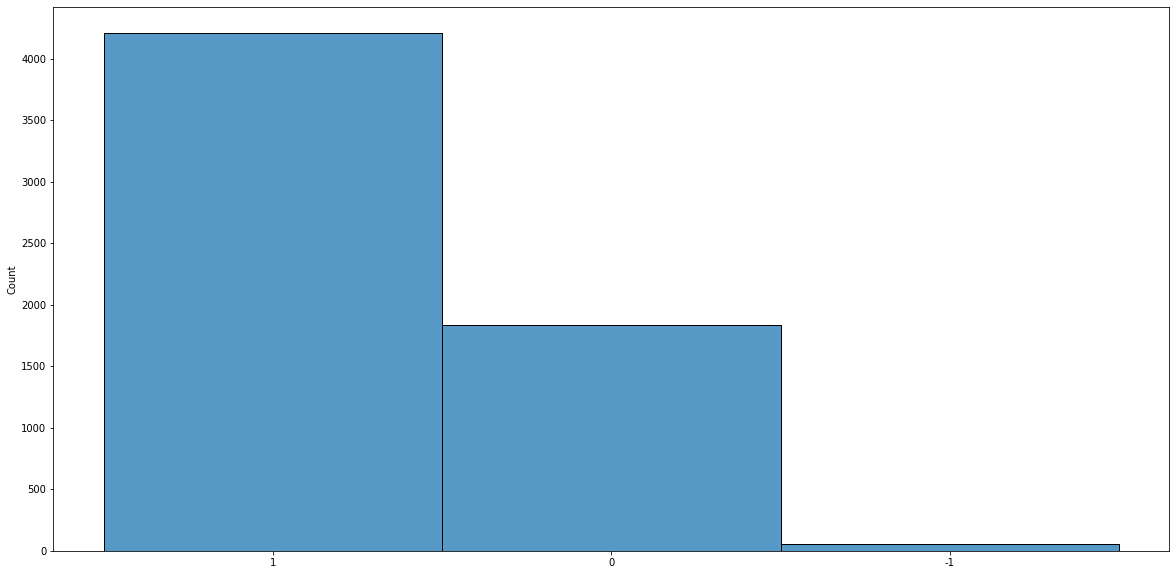

In [30]:
y_pred = model.predict(prepared_df["tweet"].astype('str'))

ax = sns.histplot(y_pred, discrete=True)
ax.set_xticklabels(["1", "0", "-1"])

In [31]:
y_positive = y_pred[y_pred == '1']
y_neutral = y_pred[y_pred == '0']
y_negative = y_pred[y_pred == '-1']


In [32]:
table = {
    "label" : ["1", "0", "-1"],
    "count" : [len(y_positive), len(y_neutral), len(y_negative)],
    "percentage" : [(len(y_positive) / len(y_pred)) * 100,
                    (len(y_neutral) / len(y_pred)) * 100,
                    (len(y_negative) / len(y_pred)) * 100,
                    ]
}

stat = pd.DataFrame(table)
stat


label  count  percentage
0     1     56    0.918334
1     0   4208   69.006232
2    -1   1834   30.075435

In [33]:
result = [[], [], []]
for i in range(2):
    for index in range(len(y_pred)):
        if y_pred[index] == '1':
            result[0].append(index)
        elif y_pred[index] == '0':
            result[1].append(index)
        elif y_pred[index] == '-1':
            result[2].append(index)
       

# Testing

In [34]:
for i in range(3):
    print(table["label"][i] + " :\n" + str(df.iloc[random.choice(result[i])]["tweet"]) + "\n\n")

1 :
['ÿ®ŸÜÿ∫ÿßÿ≤ŸäÿßŸÑÿ®Ÿäÿ∂ÿßÿ°ÿßÿ¨ÿ™ŸÖÿßÿπ', 'ŸÖÿµÿßŸÑÿ≠Ÿá', 'Ÿàÿ™ŸàÿßŸÅŸÇ', 'ŸÇŸàÿ™ÿßŸÜ', 'ÿπŸÉÿ≥Ÿäÿ™ÿßŸÜ', 'ŸÑÿ≠ÿ∏ÿßÿ™', 'ŸàŸÜÿ¨ÿ≠ÿ™', 'ÿßŸÑŸÖÿµÿßŸÑÿ≠Ÿáÿ®ÿßÿ±ŸÉ', 'ÿßŸÑŸá', 'ÿßŸÑÿßÿ¥ÿÆÿßÿµ', 'ŸàŸÅŸÇŸàÿß', 'ÿßŸÑŸÖÿ™ÿÆÿßÿµŸÖŸäŸÜ']


0 :
['ŸÖÿ®ÿßÿ±ÿßŸá', 'ÿßŸÑŸÇÿßÿØŸÖŸá', 'ŸÉÿßÿ≥', 'ÿßŸÑÿπÿßŸÑŸÖ', 'ŸÑÿßŸÜÿØŸäŸá', 'ÿ±ŸäÿßŸÑ', 'ŸÖÿØÿ±ŸäÿØ', 'ŸÉŸÑŸàÿ®', 'ÿßŸÖÿ±ŸäŸÉÿß', 'ÿßŸÑÿÆŸÖŸäÿ≥', 'ÿØŸäÿ≥ŸÖÿ®ÿ±', 'ÿ∏Ÿáÿ±ÿß', 'ÿ®ÿ™ŸàŸÇŸäÿ™', 'ŸÖŸÉŸá', 'ÿ≠ŸÅŸäÿ∏', 'ÿßŸÑ']


-1 :
['ŸÖÿµÿ±', 'ÿ™Ÿáÿ≤ŸÖ', 'ÿßŸÑŸàŸÑÿßŸäÿßÿ™', 'ÿßŸÑŸÖÿ™ÿ≠ÿØŸá', 'Ÿàÿ™ÿßŸáŸÑ', 'ŸÑŸÜÿµŸÅ', 'ŸÜŸáÿßÿ¶Ÿä', 'ÿ®ÿ∑ŸàŸÑŸá', 'ÿßŸÑÿπÿßŸÑŸÖ', 'ŸÑÿ≥ŸäÿØÿßÿ™', 'ÿßŸÑÿßÿ≥ŸÉŸàÿßÿ¥', 'ÿßŸÑŸÖŸÇÿßŸÖŸá', 'ÿ®ÿßÿ±Ÿäÿ≥ÿßŸÑÿπÿ±ÿ®ŸäŸá', 'ÿ™ŸàŸäÿ™ÿ±', 'ÿ™ŸáÿØ', 'ÿ®ÿ≠ÿ∏ÿ±', 'ÿ≠ÿ≥ÿßÿ®', 'ÿ™ÿ±ÿßŸÖÿ®', 'ÿßÿ∞ÿß', 'ÿßŸÜÿ™ŸáŸÉ', 'ŸÇŸàÿßÿπÿØ', 'ÿ¥ÿ®ŸÉÿ™Ÿáÿß', 'ÿßŸÑÿßÿ¨ÿ™ŸÖÿßÿπŸäŸá', 'ÿßŸÑÿ™ÿ≠ÿ±ÿ¥', 'ÿßŸÑŸÖŸáÿßÿ¨ÿ±ŸäŸÜ', 'ÿßŸÑŸàŸÑÿßŸäÿßÿ™', 'ÿßŸÑŸÖÿ™ÿ≠ÿØŸá']




In [35]:
y_pred = model.predict(["ÿ≠ŸÑŸàŸá"])
y_pred

array(['1'], dtype=object)